In [3]:
## importing dependencies

# import the libraries as shown below
import pandas as pd
import numpy as np
import tensorflow as tf
from glob import glob
import matplotlib.pyplot as plt

#Importing the tensorflow models
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

In [4]:
tf.__version__

'2.7.0'

In [5]:
# defining the image size for modelling
IMAGE_SIZE = [224, 224]

In [7]:
train_path = r'C:\Users\satvi\test data(amazon)\train data'
valid_path = r'C:\Users\satvi\test data(amazon)\test data'

In [8]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 11s 0us/step


In [9]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [10]:
 # useful for getting number of output classes
folders = glob(r'C:\Users\satvi\test data(amazon)\train data/*')

In [11]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [70]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r'C:\Users\satvi\test data(amazon)\train data',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 583 images belonging to 3 classes.


In [19]:
test_set = test_datagen.flow_from_directory(r'C:\Users\satvi\test data(amazon)\test data',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 250 images belonging to 3 classes.


In [35]:
from skimage import io
def imshow(image_RGB):
    io.imshow(image_RGB)
    io.show()

32
[1. 0. 0.]


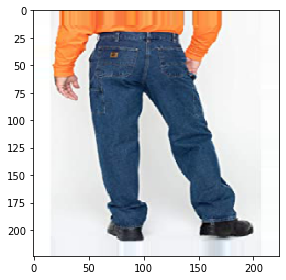

[1. 0. 0.]


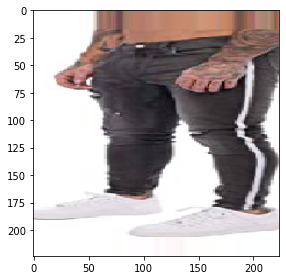

[0. 1. 0.]


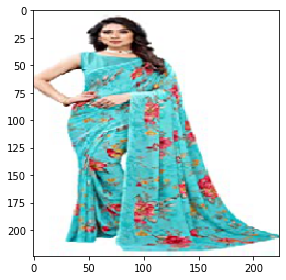

[1. 0. 0.]


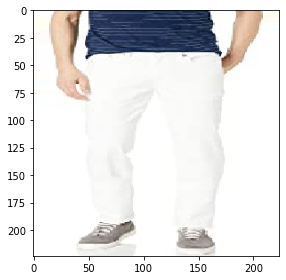

[0. 0. 1.]


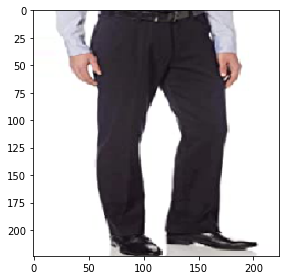

[1. 0. 0.]


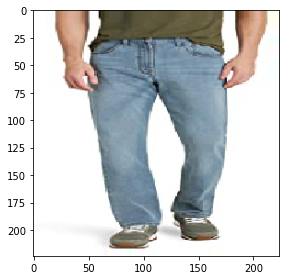

[0. 0. 1.]


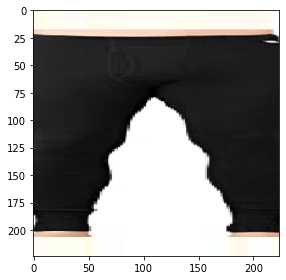

[1. 0. 0.]


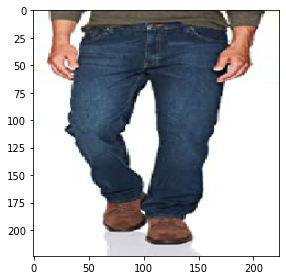

[0. 0. 1.]


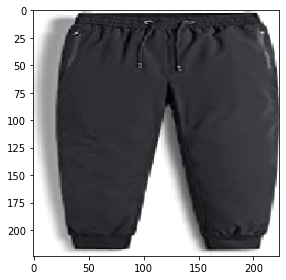

[0. 0. 1.]


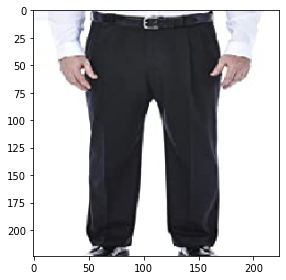

[0. 1. 0.]


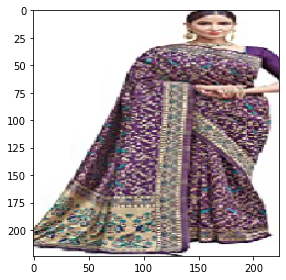

[1. 0. 0.]


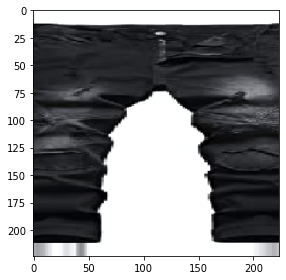

[0. 0. 1.]


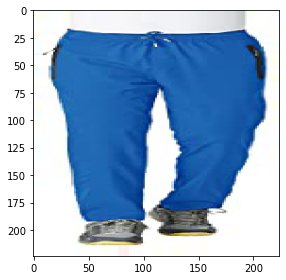

[0. 0. 1.]


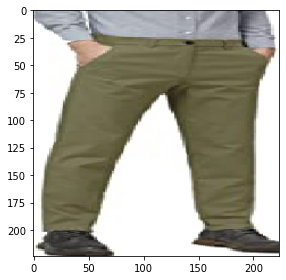

[1. 0. 0.]


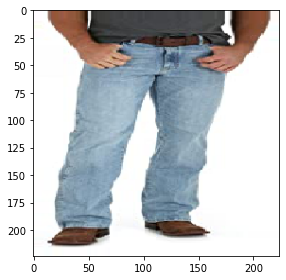

[0. 0. 1.]


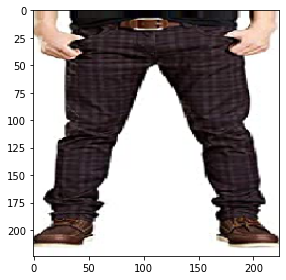

[0. 0. 1.]


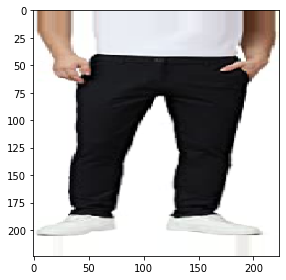

[1. 0. 0.]


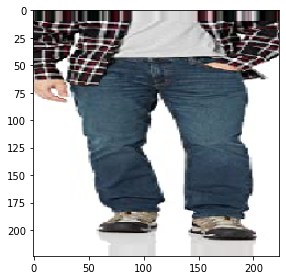

[0. 0. 1.]


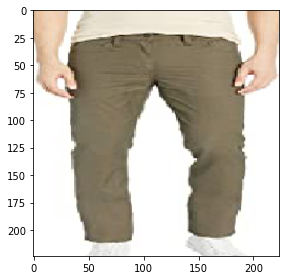

[0. 0. 1.]


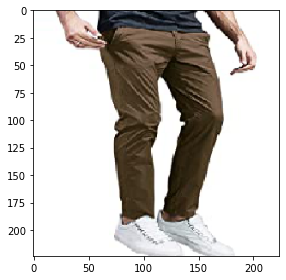

[0. 1. 0.]


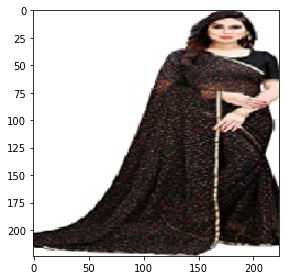

[0. 0. 1.]


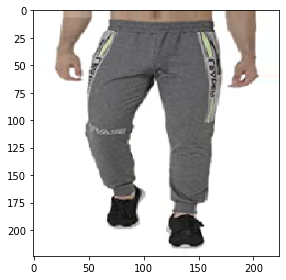

[1. 0. 0.]


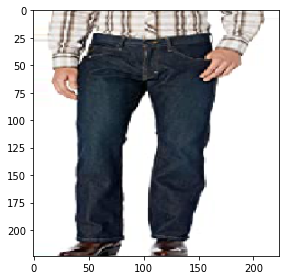

[1. 0. 0.]


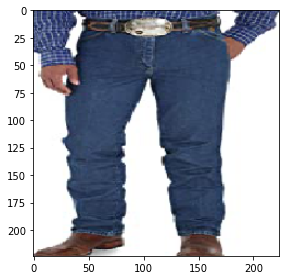

[0. 0. 1.]


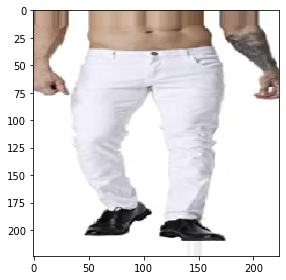

[1. 0. 0.]


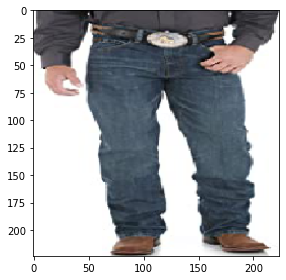

[0. 0. 1.]


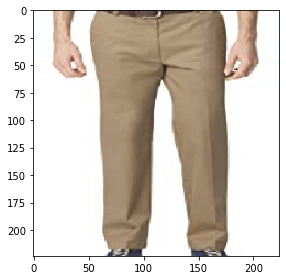

[1. 0. 0.]


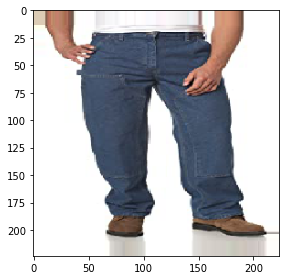

[0. 0. 1.]


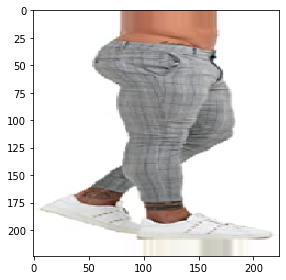

[0. 0. 1.]


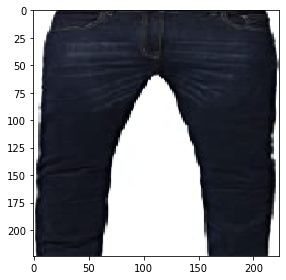

[0. 0. 1.]


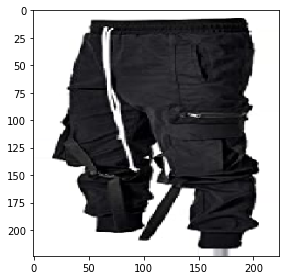

[0. 0. 1.]


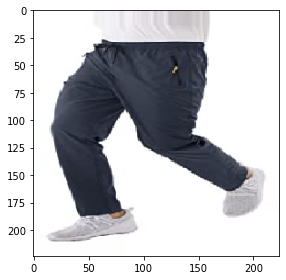

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = training_set .next()
print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [21]:
# fitting the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
19/19 [==============================] - 92s 5s/step - loss: 0.8525 - accuracy: 0.7153 - val_loss: 0.6750 - val_accuracy: 0.7440
Epoch 2/50
19/19 [==============================] - 88s 5s/step - loss: 0.5856 - accuracy: 0.7444 - val_loss: 0.6030 - val_accuracy: 0.7800
Epoch 3/50
19/19 [==============================] - 87s 5s/step - loss: 0.5331 - accuracy: 0.7907 - val_loss: 0.7444 - val_accuracy: 0.7520
Epoch 4/50
19/19 [==============================] - 87s 5s/step - loss: 1.0476 - accuracy: 0.6672 - val_loss: 1.1886 - val_accuracy: 0.7120
Epoch 5/50
19/19 [==============================] - 88s 5s/step - loss: 0.7291 - accuracy: 0.7101 - val_loss: 0.6132 - val_accuracy: 0.7880
Epoch 6/50
19/19 [==============================] - 87s 5s/step - loss: 0.4083 - accuracy: 0.8148 - val_loss: 0.4854 - val_accuracy: 0.8320
Epoch 7/50
19/19 [==============================] - 87s 5s/step - loss: 0.4037 - accuracy: 0.8199 - val_loss: 0.4523 - val_accuracy: 0.8480
Epoch 8/50
19/19 [==

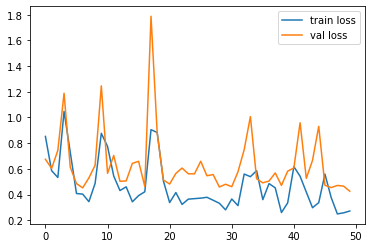

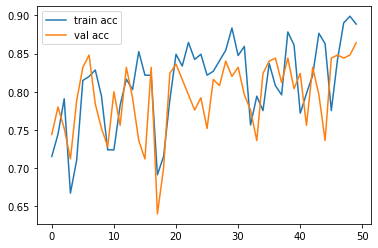

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
y_pred = model.predict(test_set)
y_pred

array([[1.83857068e-10, 1.00000000e+00, 1.62397340e-09],
       [2.24376748e-07, 9.99999166e-01, 6.41262204e-07],
       [1.01730286e-03, 4.65049015e-06, 9.98978019e-01],
       [5.32644928e-01, 4.22174949e-03, 4.63133305e-01],
       [9.67566490e-01, 2.54449318e-04, 3.21790315e-02],
       [1.59355566e-01, 4.02475038e-04, 8.40241969e-01],
       [9.66522276e-01, 2.81499524e-04, 3.31962518e-02],
       [2.57707325e-06, 9.99967813e-01, 2.95960526e-05],
       [2.04595909e-01, 4.27857685e-07, 7.95403659e-01],
       [9.95616256e-10, 1.00000000e+00, 1.39221712e-09],
       [2.31995422e-04, 9.99735415e-01, 3.25849614e-05],
       [6.72389055e-04, 6.11587503e-10, 9.99327660e-01],
       [9.70326126e-01, 7.18220328e-09, 2.96738595e-02],
       [4.41076547e-01, 1.81283499e-03, 5.57110608e-01],
       [3.09178472e-01, 7.24983522e-08, 6.90821409e-01],
       [7.45566808e-07, 9.99999285e-01, 1.60208042e-08],
       [7.49422729e-01, 2.89027639e-07, 2.50576943e-01],
       [1.83946504e-05, 9.99963

In [31]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1,
       1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 2,
       0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 2, 1,
       2, 2, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 0, 1, 2, 0, 0, 0, 2,
       2, 2, 2, 1, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 2, 2, 2, 2], dtype=int64)

In [33]:
# Model saving as h5 file


from tensorflow.keras.models import load_model

model.save('image_classification.h5')